광고 제거

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [3]:
data = pd.read_csv('네이버 뷰 술집.csv', encoding='utf-8-sig')
data

,Unnamed: 0,time,review,comment,like,url
0,0,2022. 5. 8. 14:08,"Tasty Road 을지로3가술집 ""아트몬스터 을지로점"", 힙...",[],[],https://blog.naver.com/glass325/222724760862
1,1,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656
2,2,2022. 2. 4. 16:44,백수 일상 [백수일기] 뒤죽박죽 2021년도 마지막 일기였던것...,[],12,https://blog.naver.com/ppp4112/222638850897
3,3,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667
4,4,2022. 5. 10. 16:27,먹방찍기욧 인스타감성 흐르는 건대 파스타 맛집 서울...,[],3,https://blog.naver.com/newbea44/222727484006
...,...,...,...,...,...,...
5470,5470,2022. 5. 27. 8:04,나를 많이 흔든 곳 울산 삼산동 술집 : 인스타 감성 뿜뿜 와...,[],14,https://blog.naver.com/hongyoumi/222748484932
5471,5471,2022. 7. 4. 20:00,냐미 신당역 칵테일bar 주신당 이색칵테일바 추천! ...,[],7,https://blog.naver.com/gywn8617/222800060567
5472,5472,2022. 4. 26. 12:15,일상을올려요 어느덧 4월말이라니! 경으니으니 ・...,[],11,https://blog.naver.com/epsqj08/222711909012
5473,5473,2022. 8. 25. 9:27,맛집 [을지로 맛집]을지 장만옥(홍콩감성 제대로 즐기는 ...,[],[],https://blog.naver.com/dhluxury/222857597110


In [4]:
del data['Unnamed: 0']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   time     5475 non-null   object
 1   review   5475 non-null   object
 2   comment  5475 non-null   object
 3   like     5475 non-null   object
 4   url      5475 non-null   object
dtypes: object(5)
memory usage: 214.0+ KB


### 광고글 특징
1. 특정 단어 포함한 게시글 : '제공받아', '지원받아','해당업체'
2. (네이버 블로그만의 특징) 게시글 길이가 3000자 이상이면 광고글 상위 노출 조건에 해당하여 광고로 볼 수 있음

1번

In [5]:
# 광고글 특징을 stopwords로 지정하여 해당 글은 삭제할 수 있게 함
# 분석가 판단 하에 추가 광고 문구 확인하여 stopwords에 추가

Stopwords = ['제공받아','제공받았','지원받아','지원받았','해당업체','해시태그','업체로부터',
             '체험후기','무상지급받은','무상지급','카카오톡플러스친구','톡톡하세요','네이버톡톡',
             '네이버 톡톡','무상지원','카카오톡 플러스친구','스토리링크','카카오 채널']


In [6]:
data = data[~data['review'].str.contains('|'.join(Stopwords))]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2022. 5. 8. 14:08,"Tasty Road 을지로3가술집 ""아트몬스터 을지로점"", 힙...",[],[],https://blog.naver.com/glass325/222724760862
1,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656
2,2022. 2. 4. 16:44,백수 일상 [백수일기] 뒤죽박죽 2021년도 마지막 일기였던것...,[],12,https://blog.naver.com/ppp4112/222638850897
3,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667
4,2022. 5. 10. 16:27,먹방찍기욧 인스타감성 흐르는 건대 파스타 맛집 서울...,[],3,https://blog.naver.com/newbea44/222727484006
...,...,...,...,...,...
5375,2022. 5. 27. 8:04,나를 많이 흔든 곳 울산 삼산동 술집 : 인스타 감성 뿜뿜 와...,[],14,https://blog.naver.com/hongyoumi/222748484932
5376,2022. 7. 4. 20:00,냐미 신당역 칵테일bar 주신당 이색칵테일바 추천! ...,[],7,https://blog.naver.com/gywn8617/222800060567
5377,2022. 4. 26. 12:15,일상을올려요 어느덧 4월말이라니! 경으니으니 ・...,[],11,https://blog.naver.com/epsqj08/222711909012
5378,2022. 8. 25. 9:27,맛집 [을지로 맛집]을지 장만옥(홍콩감성 제대로 즐기는 ...,[],[],https://blog.naver.com/dhluxury/222857597110


2번

In [7]:
ix = data['review'].str.len() > 3000
data = data.loc[~ix]
data = data.reset_index(drop=True)
data

,time,review,comment,like,url
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827
...,...,...,...,...,...
2366,2022. 4. 29. 18:52,eat (전포) 길목실비마차 - 찐로컬 홍이 ・...,[],23,https://blog.naver.com/thdrmsghk34/222715696546
2367,2022. 6. 20. 12:00,맛집 용산역 맛집 겸 술집 용리단길 대림국수 신용산점 방문 후...,[],1,https://blog.naver.com/dxhyxbb/222774067541
2368,2022. 5. 27. 8:04,나를 많이 흔든 곳 울산 삼산동 술집 : 인스타 감성 뿜뿜 와...,[],14,https://blog.naver.com/hongyoumi/222748484932
2369,2022. 8. 25. 9:27,맛집 [을지로 맛집]을지 장만옥(홍콩감성 제대로 즐기는 ...,[],[],https://blog.naver.com/dhluxury/222857597110


In [8]:
# 기본 전처리
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus


In [9]:
# 블로그 본문, 댓글 합쳐 하나의 document로 만들기

data['doc'] = data['review'] + ' ' + data['comment']
data.head()

,time,review,comment,like,url,doc
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양..."


In [10]:
data.doc = data.doc.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
data.doc = data.doc.str.replace('\s+',' ')  # white space(빈칸) 삭제

data

C:\Users\user\AppData\Local\Temp\ipykernel_17188\526420279.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('[^가-힣]',' ') # 한글만 남기고 특수문자, 숫자, 영어 삭제
C:\Users\user\AppData\Local\Temp\ipykernel_17188\526420279.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.doc = data.doc.str.replace('\s+',' ')  # white space(빈칸) 삭제


,time,review,comment,like,url,doc
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656,맛집 술 강남 강남역 맥주집 을지로 가맥 랭맥 복사 이웃추가 본문 기타 기능 지도...
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667,블챌 주간일기 챌린지 월 셋째주 핫플탐방 을지로와 연희동 복사 이웃추가 본문 기타...
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀미 복사 이웃추가 본문 기타 기...
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937,냠냠쩝쩝 종로 맛집 이색적인 음식으로 가득한 주교팔삼 복사 이웃추가 본문 기타 기...
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827,블챌 주간일기 챌린지 을지로 맛집 아키나이 제면 세광 양대창 카페 크림시크 빌리엔...
...,...,...,...,...,...,...
2366,2022. 4. 29. 18:52,eat (전포) 길목실비마차 - 찐로컬 홍이 ・...,[],23,https://blog.naver.com/thdrmsghk34/222715696546,전포 길목실비마차 찐로컬 홍이 복사 이웃추가 본문 기타 기능 지도로 보기 전체지도...
2367,2022. 6. 20. 12:00,맛집 용산역 맛집 겸 술집 용리단길 대림국수 신용산점 방문 후...,[],1,https://blog.naver.com/dxhyxbb/222774067541,맛집 용산역 맛집 겸 술집 용리단길 대림국수 신용산점 방문 후기 유니 복사 이웃추...
2368,2022. 5. 27. 8:04,나를 많이 흔든 곳 울산 삼산동 술집 : 인스타 감성 뿜뿜 와...,[],14,https://blog.naver.com/hongyoumi/222748484932,나를 많이 흔든 곳 울산 삼산동 술집 인스타 감성 뿜뿜 와인바 글루 홍금이 복사 ...
2369,2022. 8. 25. 9:27,맛집 [을지로 맛집]을지 장만옥(홍콩감성 제대로 즐기는 ...,[],[],https://blog.naver.com/dhluxury/222857597110,맛집 을지로 맛집 을지 장만옥 홍콩감성 제대로 즐기는 핫플 복사 이웃추가 본문 기...


In [11]:
tqdm.pandas()

#data['doc'] = data['doc'].progress_apply(lambda x : clean_text(x)) # 만든 함수를 적용하는건데 뭔가 오류가 있는 것 같아서 일단 사용 X

In [12]:
data.to_csv('네이버 뷰 술집(전처리).csv', encoding='utf-8-sig')

### 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해 줌
- 단어로 만드는 과정에서 
    1) 분석에 불필요한 불용어 제거 
    2) 단어를 사전형으로 처리(가고있다->가다, 있다)
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [14]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [15]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize
from konlpy.tag import Okt

In [16]:
# 원하는 태그 추출 & 불용어 제거
okt = Okt()

# 불용어
stopwords = pd.read_csv('ko-stopwords.csv')
stopwords = list(stopwords['stopwords'])
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 ]) #불용어 추가

stopwords = set(stopwords)

# 형태소 분석 함수 만들기
def okt_pos_tagging(string):
    pos_words = okt.pos(string, stem=True, norm=True)   # 형태소 분석, stem/norm : 단어는 사전형으로 바꿔주기
    words = [word for word, tag in pos_words if tag in ['Noun','Adjective', 'Verb', 'Adverb'] if word not in stopwords]
    return words

In [17]:
# 형태소 분석 적용
tokenizing_doc = []
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token'] = tokenizing_doc  # 새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원문을 매칭

100%|██████████| 2371/2371 [02:26<00:00, 16.21it/s]


In [18]:
data.token

0       [맛집, 술, 강남, 강남역, 맥주, 집, 을지로, 맥, 랭맥, 복사, 이웃, 추가...
1       [블챌, 주간, 일기, 채다, 린지, 주, 핫, 탐방, 을지로, 연희동, 복사, 이...
2       [맛집, 라이프, 힙, 일산, 카페, 콘, 파다, 맛집, 크라프트온, 꿀, 밉다, ...
3       [냠냠, 쩝쩝, 종로, 맛집, 이색, 음식, 가득하다, 주교, 팔삼, 복사, 이웃,...
4       [블챌, 주간, 일기, 채다, 린지, 을지로, 맛집, 아키, 나이, 광, 창, 카페...
                              ...                        
2366    [길목, 실비, 마차, 찌다, 컬, 홍, 복사, 이웃, 추가, 본문, 기능, 지도,...
2367    [맛집, 용산역, 맛집, 겸, 술집, 용다, 달다, 대림, 국수, 신용산, 점, 방...
2368    [나르다, 많이, 흔들다, 곳, 울산, 삼산동, 술집, 인스타, 감성, 뿜뿜, 와인...
2369    [맛집, 을지로, 맛집, 을지, 장만옥, 홍콩, 감성, 제대로, 즐기다, 핫, 복사...
2370    [블챌, 주간, 일기, 채다, 린지, 을지로, 와인, 바, 아스, 론, 조용하다, ...
Name: token, Length: 2371, dtype: object

In [19]:
# 명사 추출
text_noun = [okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])
data

,time,review,comment,like,url,doc,token,text_noun
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656,맛집 술 강남 강남역 맥주집 을지로 가맥 랭맥 복사 이웃추가 본문 기타 기능 지도...,"[맛집, 술, 강남, 강남역, 맥주, 집, 을지로, 맥, 랭맥, 복사, 이웃, 추가...","[맛집, 술, 강남, 강남역, 맥주, 집, 을지로, 맥, 랭맥, 복사, 이웃, 추가..."
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667,블챌 주간일기 챌린지 월 셋째주 핫플탐방 을지로와 연희동 복사 이웃추가 본문 기타...,"[블챌, 주간, 일기, 채다, 린지, 주, 핫, 탐방, 을지로, 연희동, 복사, 이...","[블챌, 주간, 일기, 린지, 주, 핫, 탐방, 을지로, 연희동, 복사, 이웃, 추..."
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀미 복사 이웃추가 본문 기타 기...,"[맛집, 라이프, 힙, 일산, 카페, 콘, 파다, 맛집, 크라프트온, 꿀, 밉다, ...","[맛집, 라이프, 힙, 일산, 카페, 콘, 맛집, 크라프트온, 꿀, 복사, 이웃, ..."
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937,냠냠쩝쩝 종로 맛집 이색적인 음식으로 가득한 주교팔삼 복사 이웃추가 본문 기타 기...,"[냠냠, 쩝쩝, 종로, 맛집, 이색, 음식, 가득하다, 주교, 팔삼, 복사, 이웃,...","[종로, 맛집, 이색, 음식, 주교, 팔삼, 복사, 이웃, 추가, 본문, 기능, 지..."
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827,블챌 주간일기 챌린지 을지로 맛집 아키나이 제면 세광 양대창 카페 크림시크 빌리엔...,"[블챌, 주간, 일기, 채다, 린지, 을지로, 맛집, 아키, 나이, 광, 창, 카페...","[블챌, 주간, 일기, 린지, 을지로, 맛집, 아키, 나이, 광, 창, 카페, 크림..."
...,...,...,...,...,...,...,...,...
2366,2022. 4. 29. 18:52,eat (전포) 길목실비마차 - 찐로컬 홍이 ・...,[],23,https://blog.naver.com/thdrmsghk34/222715696546,전포 길목실비마차 찐로컬 홍이 복사 이웃추가 본문 기타 기능 지도로 보기 전체지도...,"[길목, 실비, 마차, 찌다, 컬, 홍, 복사, 이웃, 추가, 본문, 기능, 지도,...","[길목, 실비, 마차, 컬, 홍, 복사, 이웃, 추가, 본문, 기능, 지도, 보기,..."
2367,2022. 6. 20. 12:00,맛집 용산역 맛집 겸 술집 용리단길 대림국수 신용산점 방문 후...,[],1,https://blog.naver.com/dxhyxbb/222774067541,맛집 용산역 맛집 겸 술집 용리단길 대림국수 신용산점 방문 후기 유니 복사 이웃추...,"[맛집, 용산역, 맛집, 겸, 술집, 용다, 달다, 대림, 국수, 신용산, 점, 방...","[맛집, 용산역, 맛집, 겸, 술집, 대림, 국수, 신용산, 점, 방문, 후기, 유..."
2368,2022. 5. 27. 8:04,나를 많이 흔든 곳 울산 삼산동 술집 : 인스타 감성 뿜뿜 와...,[],14,https://blog.naver.com/hongyoumi/222748484932,나를 많이 흔든 곳 울산 삼산동 술집 인스타 감성 뿜뿜 와인바 글루 홍금이 복사 ...,"[나르다, 많이, 흔들다, 곳, 울산, 삼산동, 술집, 인스타, 감성, 뿜뿜, 와인...","[곳, 울산, 삼산동, 술집, 인스타, 감성, 뿜뿜, 와인, 바, 글루, 홍금, 복..."
2369,2022. 8. 25. 9:27,맛집 [을지로 맛집]을지 장만옥(홍콩감성 제대로 즐기는 ...,[],[],https://blog.naver.com/dhluxury/222857597110,맛집 을지로 맛집 을지 장만옥 홍콩감성 제대로 즐기는 핫플 복사 이웃추가 본문 기...,"[맛집, 을지로, 맛집, 을지, 장만옥, 홍콩, 감성, 제대로, 즐기다, 핫, 복사...","[맛집, 을지로, 맛집, 을지, 장만옥, 홍콩, 감성, 제대로, 핫, 복사, 이웃,..."


### wordcloud

In [20]:
# 리스트 차원 낮춰주는 함수 생성
# 하나의 리스트 안에 들어가야 하기 때문에 늘려주는 작업

def flatten(i):
    flatlist = []
    for elem in i :
        if type(elem) == list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist

In [21]:
data1 = data.token.tolist() # series -> list
data2 = flatten(data1)
data2[:20]

['맛집',
 '술',
 '강남',
 '강남역',
 '맥주',
 '집',
 '을지로',
 '맥',
 '랭맥',
 '복사',
 '이웃',
 '추가',
 '본문',
 '기능',
 '지도',
 '보기',
 '전체',
 '도지',
 '닫다',
 '공유']

In [22]:
text = nltk.Text(data2)
text

<Text: 맛집 술 강남 강남역 맥주 집 을지로 맥...>

In [23]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [24]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

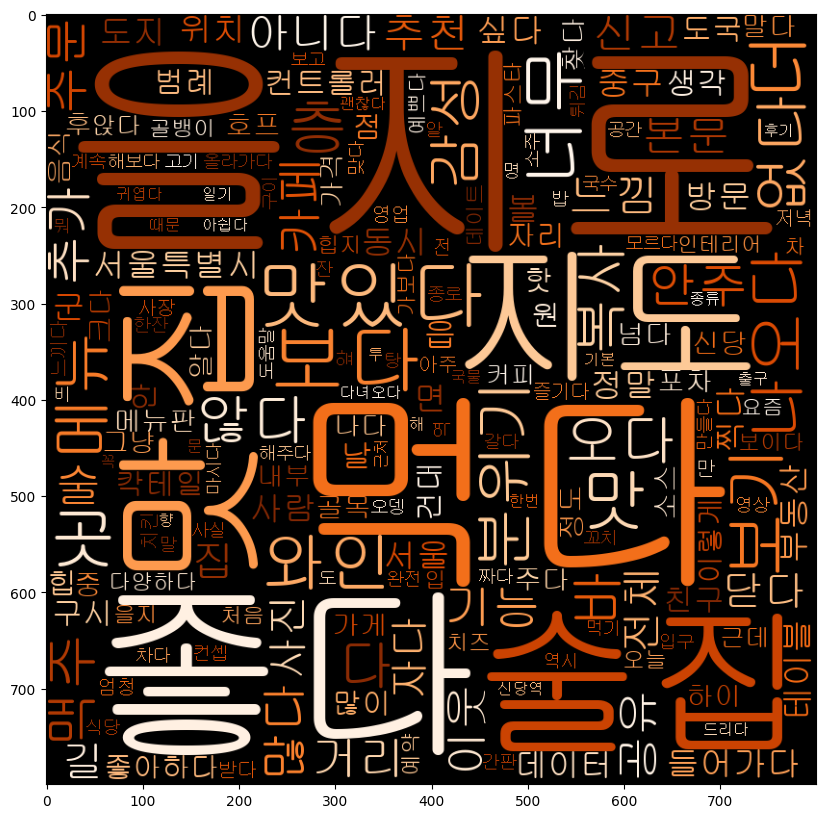

In [25]:
# 명사, 동사, 형용사, 부사로 워드클라우드

font_path = 'C:\Windows\Fonts\gulim.ttc'

wordclouds = WordCloud(width=800,height=800,background_color='Black',colormap='Oranges',font_path=font_path)
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()

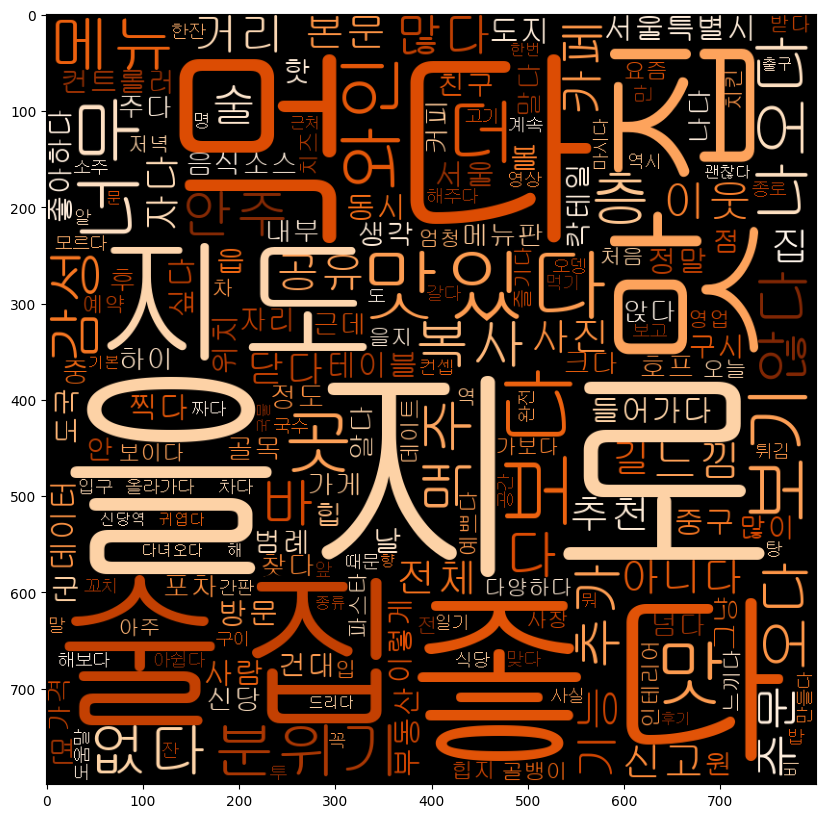

In [26]:
# 명사로만 워드클라우드
df_noun = data.text_noun.tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

wordclouds = WordCloud(width=800,height=800,background_color='Black',colormap='Oranges',font_path=font_path)
count = Counter(text)
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(10,10))
plt.imshow(wordclouds.to_array())
plt.show()


### 군집분석 - Clustering(Actor 도출)
- 단어가 많이 나온다고 무조건 중요한 단어가 아니라 
- 이 문서에만 독특하게 나오는 단어들이 중요하다고 생각하고 뽑아내는 코드 작성

### tf-idf

In [27]:
data3 = []

for i in data1:
    string = i[0]
    for w in i[1:]: # 첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " "   # 단어 사이는 띄어쓰기로 연결
        string += w # 띄어쓰기 후 다음 단어 써주기 반복
    data3.append(string)
data3   # 쉼표 기준으로 document가 구분됨

['맛집 술 강남 강남역 맥주 집 을지로 맥 랭맥 복사 이웃 추가 본문 기능 지도 보기 전체 도지 닫다 공유 신고 전 궁금하다 강남역 랭맥 강남역 을지로 노포 스타일 술집 특히 메뉴 사진 보고 반하다 저장 뒤늦다 랭맥 강남역 출구 나오다 걸다 층 논현 라인 출구 맞다 수도 맞다 지오다노 삼거리 포차 라인 아니다 올라가다 계단 노포 기운 올라오다 들어가다 출입구 노포 온 마냥 인테리어 너무 막히다 자다 느낌 자동 문 보이다 수많다 레드 조명 속 알 없다 기계 금요일 생각 매장 한산하다 다 차로 오다 분위기 이유 아래 자리 앉다 가게 둘러보다 보다 어떻다 이렇게 노포 자다 꾸미다 두다 테이블 간 간격 넓다 땐 사람 많다 않다 음악 소리 크게 거슬리다 않다 만석 음악 소리 버프 받다 소문 시끄럽다 메뉴판 대부분 일차 안주 아니다 가격 그다지 저렴하다 않다 목적 떡 구이 날치 알 명란 크림 파스타 원래 생크림 모닝 빵 먹다 생각 높다 가격 일차 부담 감 포기 가게 이름 랭맥 쌩맥 자다 보기 해도 시원하다 맥주 맛 개인 싱겁다 느끼다 따다 소주 타 먹다 차다 기대하다 제일 먹다 보고 싶다 떡 구이 근데 당연하다 떡 꼬치 소스 줄 생각 걸다 조청 등장 떡 구이 조청 주다 아쉽다 안 먹다 안 함 아쉽다 맛 다 음 명란 크림 날치 알파 스타 나오다 비주 얼 다 박수 절로 나오다 따다 꾸덕꾸덕 매콤 느끼하다 않다 니뽕내뽕 스타일 니뽕내뽕 덜 자극 그릇 엄 청 크다 깊이 얕다 래서 많이 먹다 인지 소스 떡 야무지다 설거지 먹다 날치 알 섞다 전 마지막 사진 골고루 섞다 입 먹다 오다 무조건 차야 요 마늘빵 생각 특색 없다 너무 평범하다 맛 없다 느껴지다 따내다 스타일 아닌걸루 안주 맛있다 분위기 강남 쉬다 찾아보다 분위기 개인 일차 술집 아니다 낌 쎄다 받다 따다 무조건 다양하다 먹다 추천 특히 생크림 모닝 빵 소주 조합 대신 먹어주다 입구 반대편 사진 마무리 끝 더 보기 지도 데이터 지도 컨트롤러 범례 부동산 거리 읍 면 동시 군 구시 도국 랭맥 서울특별시 강남구 강남대로 길

In [28]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\user\appdata\local\programs\python\python38\lib\site-packages (1.1.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [31]:
from collections import defaultdict

word2id = defaultdict(lambda:0)    # value가 없는 key인 경우 error대신 0을 출력

In [32]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
tfidf=[]
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i, word2id[token]]) for token in sent.split()])
# 단어들을 수치로 변환

In [34]:
tfidf[3]

[('냠냠', 0.048058667680666106),
 ('쩝쩝', 0.06647040575347787),
 ('종로', 0.11502103354923414),
 ('맛집', 0.11439286774397261),
 ('이색', 0.09102508323561799),
 ('음식', 0.026420551607254362),
 ('가득하다', 0.039769084808486864),
 ('주교', 0.5470905289046395),
 ('팔삼', 0.19200031799797893),
 ('복사', 0.011948955645205196),
 ('이웃', 0.011953994291418513),
 ('추가', 0.011953994291418513),
 ('본문', 0.011953994291418513),
 ('기능', 0.011948955645205196),
 ('지도', 0.04200089262264109),
 ('보기', 0.027750473419591148),
 ('전체', 0.014658788638327248),
 ('도지', 0.015242391021229623),
 ('닫다', 0.014786023760796768),
 ('공유', 0.011943919134463951),
 ('신고', 0.011953994291418513),
 ('위치', 0.03725141767265335),
 ('주교', 0.5470905289046395),
 ('오늘', 0.025855348589735455),
 ('친하다', 0.11853460376130194),
 ('언니', 0.1343164328002236),
 ('서울', 0.02355953223664828),
 ('나들이', 0.053089285482159854),
 ('광장시장', 0.23816200479201674),
 ('종로', 0.11502103354923414),
 ('역', 0.0),
 ('을지로', 0.027362667190806267),
 ('역', 0.0),
 ('근처', 0.0305045016328

### 토픽 개수 정하기

In [35]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\user\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [36]:
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim

In [37]:
dictionary = corpora.Dictionary(data1)
dictionary

In [38]:
#tuple로 mapping해주는 함수, doc2bow
#단어를 index로 mapping, 몇번 나왔는지
corpus = [dictionary.doc2bow(text) for text in data1]
corpus[:1]

[[(0, 2),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 4),
  (9, 2),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 3),
  (37, 2),
  (38, 1),
  (39, 4),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 5),
  (68, 2),
  (69, 1),
  (70, 5),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 3),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 8),
  (89, 1),
  (90, 1),
  (91, 1)

In [39]:
values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))
    # perplexity(혼잡도) : 클러스터링 안의 결과들 간의 유사성 확인
    # 낮을수록 좋음

Text(0, 0.5, 'Score')

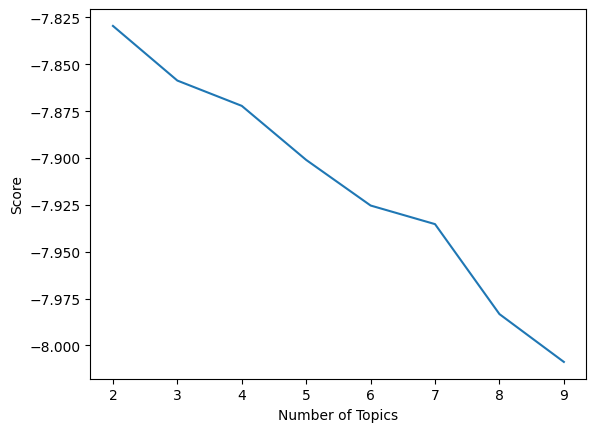

In [40]:
x = range(2,10)
plt.plot(x, values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')
# 꺾이는 부분을 기준으로 군집을 나눔
# 원본을 보고 그래프와 비슷한 경향인지 확인

In [41]:
# coherence 확인(군집 평가)
# coherence 높을수록 일관성 높음 -> 좋음
coherence_values = []
for i in range(2, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = data1, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)


Text(0, 0.5, 'Score')

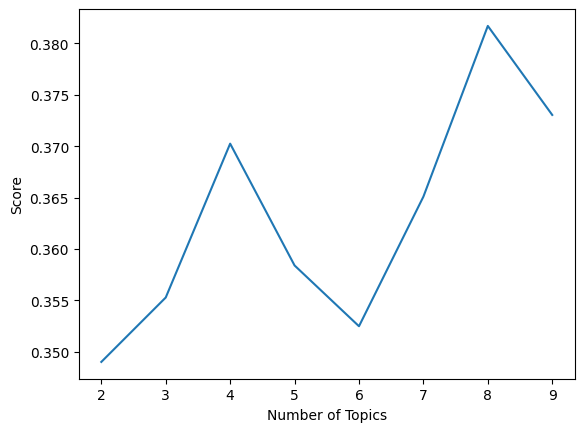

In [42]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

for문 안에 두 개 다 넣으면 coherence_values 리스트에 값이 제대로 안들어감... 왜???
- ldamodel 변수명과 model=ldamodel 인자의 이름이 똑같아서 모델이 잘못 돌아가는 것 같음
- 변수명을 변경해보고 다시 돌려보고 결과 보기 

In [43]:
coherence_values1 = []
values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(ldamodel.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_model_lda.get_coherence()
    coherence_values1.append(coherence_model_lda)

In [44]:
coherence_values1

In [45]:
coherence_values2 = []
values = []

for i in range(2,10):
    a = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    values.append(a.log_perplexity(corpus))
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=data1, dictionary=dictionary, topn=10)
    coherence_model_lda.get_coherence()
    coherence_values2.append(coherence_model_lda)

In [46]:
coherence_values2

NotImplementedError: cannot instantiate abstract base class

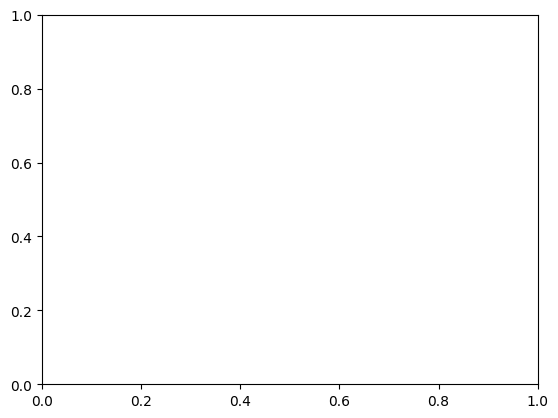

In [47]:
x = range(2,10)
plt.plot(x, coherence_values1)
plt.xlabel('Number of Topics')
plt.ylabel('Score')

### ward clustering
- 데이터의 수직적 구조를 파악할 수 있음

In [48]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc   # 수직적 구조 그릴 수 있는 기능

In [49]:
sp_matrix1 = vectorizer.fit_transform(data3)
df1 = pd.DataFrame(sp_matrix1.toarray(), columns=vectorizer.get_feature_names())
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
result = cluster.fit_predict(df1)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [50]:
df_ward = data.copy()
df_ward['클러스터'] = list(result)  # 클러스터 배치 확인
df_ward.head()

,time,review,comment,like,url,doc,token,text_noun,클러스터
0,2022. 10. 31. 10:05,맛집/술 강남/ 강남역 맥주집 을지로 가맥 랭맥 H...,[],10,https://blog.naver.com/h_annah1226/222915445656,맛집 술 강남 강남역 맥주집 을지로 가맥 랭맥 복사 이웃추가 본문 기타 기능 지도...,"[맛집, 술, 강남, 강남역, 맥주, 집, 을지로, 맥, 랭맥, 복사, 이웃, 추가...","[맛집, 술, 강남, 강남역, 맥주, 집, 을지로, 맥, 랭맥, 복사, 이웃, 추가...",0
1,2022. 7. 24. 20:45,[블챌] 주간일기 챌린지 [2022 7월 셋째주] 핫플탐...,[],2,https://blog.naver.com/hu_some/222827161667,블챌 주간일기 챌린지 월 셋째주 핫플탐방 을지로와 연희동 복사 이웃추가 본문 기타...,"[블챌, 주간, 일기, 채다, 린지, 주, 핫, 탐방, 을지로, 연희동, 복사, 이...","[블챌, 주간, 일기, 린지, 주, 핫, 탐방, 을지로, 연희동, 복사, 이웃, 추...",0
2,2022. 2. 28. 12:10,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀...,[],15,https://blog.naver.com/idman83/222659889295,맛집라이프 힙한 일산카페 콘파냐맛집 크라프트온도 꿀미 복사 이웃추가 본문 기타 기...,"[맛집, 라이프, 힙, 일산, 카페, 콘, 파다, 맛집, 크라프트온, 꿀, 밉다, ...","[맛집, 라이프, 힙, 일산, 카페, 콘, 맛집, 크라프트온, 꿀, 복사, 이웃, ...",0
3,2022. 4. 13. 2:33,냠냠쩝쩝 [종로 맛집] 이색적인 음식으로 가득한 주교팔삼 ...,[],7,https://blog.naver.com/rngus999/222699193937,냠냠쩝쩝 종로 맛집 이색적인 음식으로 가득한 주교팔삼 복사 이웃추가 본문 기타 기...,"[냠냠, 쩝쩝, 종로, 맛집, 이색, 음식, 가득하다, 주교, 팔삼, 복사, 이웃,...","[종로, 맛집, 이색, 음식, 주교, 팔삼, 복사, 이웃, 추가, 본문, 기능, 지...",0
4,2022. 6. 25. 11:02,"[블챌] 주간일기 챌린지 을지로 맛집 아키나이 제면, 세광 양...",[],7,https://blog.naver.com/paakpaakpaak/222788163827,블챌 주간일기 챌린지 을지로 맛집 아키나이 제면 세광 양대창 카페 크림시크 빌리엔...,"[블챌, 주간, 일기, 채다, 린지, 을지로, 맛집, 아키, 나이, 광, 창, 카페...","[블챌, 주간, 일기, 린지, 을지로, 맛집, 아키, 나이, 광, 창, 카페, 크림...",0


In [53]:
df_ward['클러스터'].unique()

array([0, 2, 4, 1, 3], dtype=int64)

In [51]:
len(df_ward)

2371

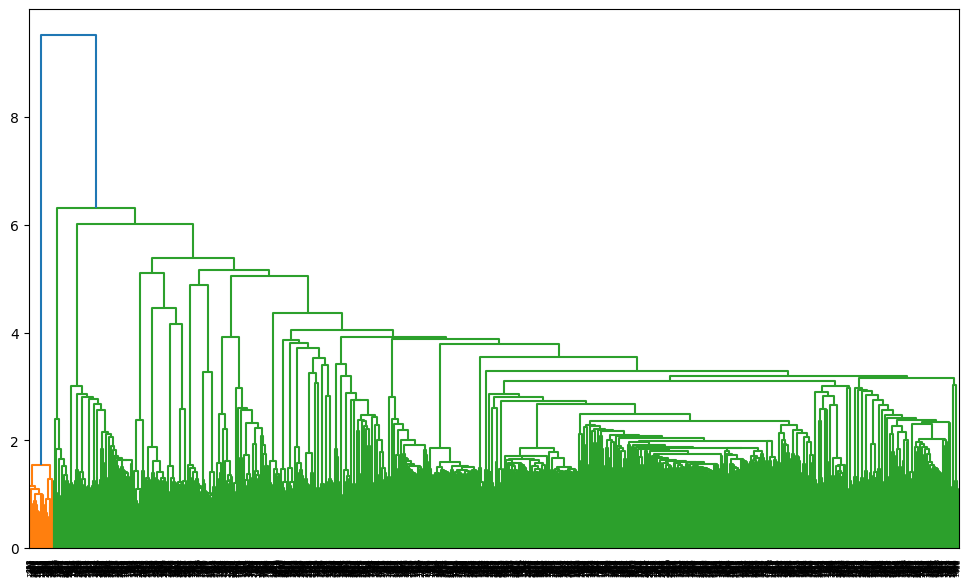

In [52]:
plt.figure(figsize=(12,7))
dend = shc.dendrogram(shc.linkage(df1, method='ward'))
# y축을 기준으로 클러스터 개수를 나눔

In [55]:
import pickle
df_ward.to_pickle('을지로신당 술집_cluster.pkl')
df_ward.to_csv('을지로신당 술집_clustering.csv', encoding='utf-8-sig')